In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA & Data preparation

In [2]:
df = pd.read_csv('data/pet_sales.csv')
df.head()

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"$123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"$61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"$218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"$69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"$138,000",133.68,VC_749,large,dog,10,0


In [3]:
df.shape

(879, 9)

In [4]:
df['sales']=df.sales.str.strip('$')
df

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,"123,000",94.81,VC_1605,small,fish,7,1
1,4567,Toys,"61,000",120.95,VC_1132,small,cat,10,0
2,4237,Toys,"218,000",106.34,VC_802,small,hamster,6,0
3,4364,Snack,"69,000",241.27,VC_929,large,dog,1,1
4,4184,Supplements,"138,000",133.68,VC_749,large,dog,10,0
...,...,...,...,...,...,...,...,...,...
874,4999,Snack,"27,000",146.93,VC_1564,medium,bird,6,0
875,4243,Snack,"76,000",174.07,VC_808,medium,hamster,8,0
876,4783,Snack,"162,000",224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,"34,000",199.15,VC_1229,large,dog,10,1


In [5]:
df = df[df['pet_type'].isin(['dog','cat','fish','bird'])]

In [6]:
df['sales'] = df.sales.str.replace(',','')

C:\Users\adamd\AppData\Local\Temp\ipykernel_19504\2350969797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = df.sales.str.replace(',','')


In [7]:
df['sales'] = pd.to_numeric(df['sales'],downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833 entries, 0 to 878
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        833 non-null    int64  
 1   product_category  833 non-null    object 
 2   sales             833 non-null    int32  
 3   price             833 non-null    float64
 4   vendor_id         833 non-null    object 
 5   pet_size          833 non-null    object 
 6   pet_type          833 non-null    object 
 7   rating            833 non-null    int64  
 8   re_buy            833 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 61.8+ KB


C:\Users\adamd\AppData\Local\Temp\ipykernel_19504\329917044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sales'] = pd.to_numeric(df['sales'],downcast='integer')


In [8]:
df.shape

(833, 9)

In [9]:
df['product_category'].unique()

array(['Equipment', 'Toys', 'Snack', 'Supplements', 'Bedding', 'Medicine',
       'Housing', 'Food', 'Clothes', 'Accessory', 'Grooming'],
      dtype=object)

In [10]:
df['product_id'].unique().shape

(833,)

In [11]:
df['vendor_id'].unique()

array(['VC_1605', 'VC_1132', 'VC_929', 'VC_749', 'VC_1174', 'VC_945',
       'VC_954', 'VC_1262', 'VC_803', 'VC_1215', 'VC_925', 'VC_1153',
       'VC_884', 'VC_1178', 'VC_1455', 'VC_1342', 'VC_1106', 'VC_1302',
       'VC_906', 'VC_1043', 'VC_744', 'VC_949', 'VC_1126', 'VC_836',
       'VC_1029', 'VC_1180', 'VC_1236', 'VC_1021', 'VC_881', 'VC_1321',
       'VC_1590', 'VC_1160', 'VC_1140', 'VC_1456', 'VC_1078', 'VC_773',
       'VC_1586', 'VC_789', 'VC_1503', 'VC_1116', 'VC_1042', 'VC_1213',
       'VC_1071', 'VC_1159', 'VC_1378', 'VC_1510', 'VC_1478', 'VC_1205',
       'VC_992', 'VC_1041', 'VC_1008', 'VC_1016', 'VC_1395', 'VC_1430',
       'VC_1566', 'VC_1613', 'VC_1074', 'VC_1006', 'VC_1422', 'VC_999',
       'VC_1096', 'VC_1614', 'VC_1383', 'VC_991', 'VC_1164', 'VC_1315',
       'VC_1065', 'VC_1553', 'VC_1047', 'VC_1130', 'VC_849', 'VC_993',
       'VC_780', 'VC_1560', 'VC_1445', 'VC_818', 'VC_938', 'VC_1517',
       'VC_845', 'VC_819', 'VC_1247', 'VC_1090', 'VC_756', 'VC_997',
    

<AxesSubplot:xlabel='pet_size', ylabel='count'>

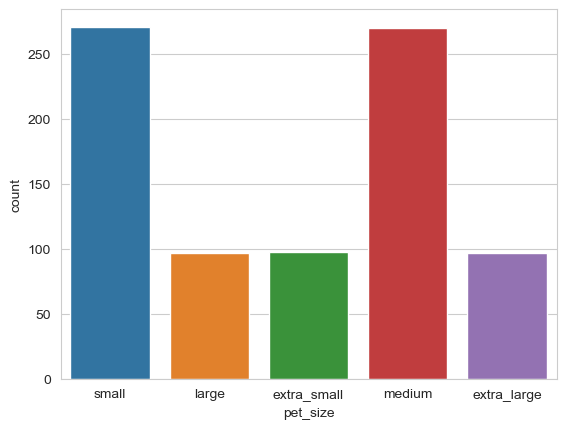

In [12]:
sns.countplot(data=df,x='pet_size')

In [13]:
df

,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0
...,...,...,...,...,...,...,...,...,...
873,4343,Equipment,212000,129.84,VC_908,medium,cat,10,1
874,4999,Snack,27000,146.93,VC_1564,medium,bird,6,0
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1


## Data preparation steps
I changed values in 'sales' column to numeric values. I checked how many unique values are in product category. I checked columns vendoor_id and product_id to check if the values are unique. Since the number of rows equals the shape of a data frame I assume that values are unique. I also filtered data by pet_type column to only show data about dogs, cats, birds and fish.

# How many products are purchased more than once ?

In [14]:
df.columns

Index(['product_id', 'product_category', 'sales', 'price', 'vendor_id',
       'pet_size', 'pet_type', 'rating', 're_buy'],
      dtype='object')

[Text(0, 0, '390'), Text(0, 0, '443')]

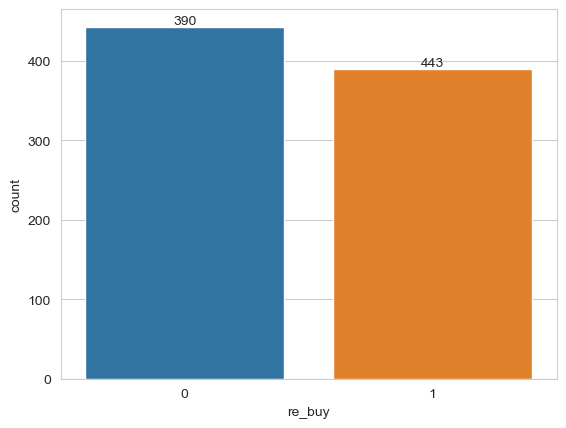

In [15]:
ax = sns.countplot(data=df,x='re_buy')
abs_values = df['re_buy'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

<AxesSubplot:xlabel='re_buy', ylabel='rating'>

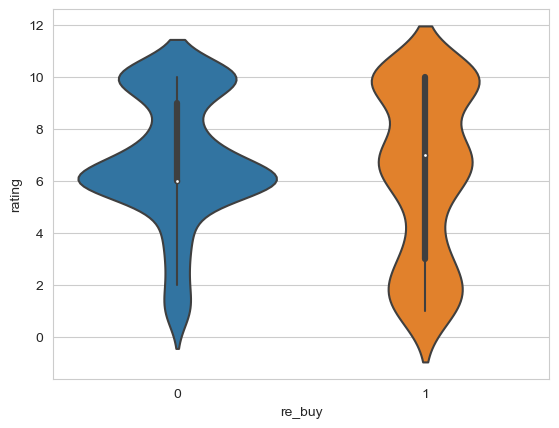

In [16]:
sns.set_style('whitegrid')
sns.violinplot(data=df, x='re_buy', y='rating')

In [17]:
table = pd.pivot_table(df,values=['product_id','price'],aggfunc={'product_id':'count','price':'mean'},index=['product_category','re_buy'])
table

price  product_id
product_category re_buy                        
Accessory        0       106.638182          22
                 1       137.944000          20
Bedding          0       124.270556          18
                 1       121.767500          24
Clothes          0       143.364348          23
                 1       113.149474          19
Equipment        0       126.490882          68
                 1       134.325072          69
Food             0       118.137059          34
                 1       125.212432          37
Grooming         0       108.458333          24
                 1       135.182941          17
Housing          0       141.261364          22
                 1       110.446000          20
Medicine         0       123.608000          35
                 1       143.733784          37
Snack            0       128.185974          77
                 1       122.064237          59
Supplements      0       123.158537          41
                 1       121.070667          30
Toys             0       118.915823          79
                 1       161.700345          58

In [18]:
df.groupby('re_buy').product_category.count()

re_buy
0    443
1    390
Name: product_category, dtype: int64

## Answer
Methodology:
To answer this question I counted the products based on the category in 're_buy' column.
There are 390 products bought more than once and 443 products bought only once. The distribution of products bough once and more than once among product categories is similar in all categories. Only in categories Bedding, Equipment, Food and Medicine the amount of products bought more than once is higher than products bought once. These categories belong to consumables so it is logical that some products are being bught more than once.

# Do the products being purchased again have better sales than others?


In [19]:
sum_data = df.groupby('re_buy').sales.sum()
sum_data

re_buy
0    51125000
1    45587000
Name: sales, dtype: int32

In [20]:
(45587000/51125000)*100

89.1677261613692

In [21]:
type(sum_data)

pandas.core.series.Series

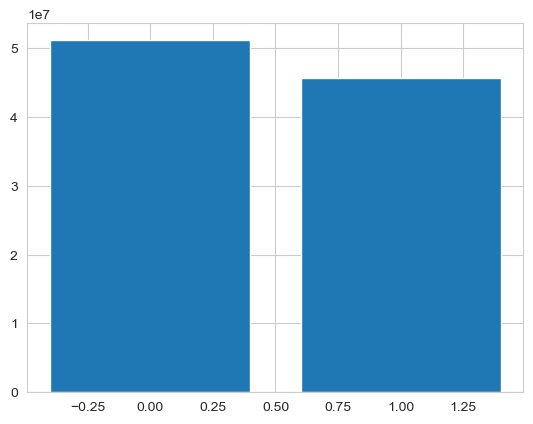

In [22]:
plt.bar(x=sum_data.index,height=sum_data.values)
plt.show()

<AxesSubplot:xlabel='re_buy', ylabel='sales'>

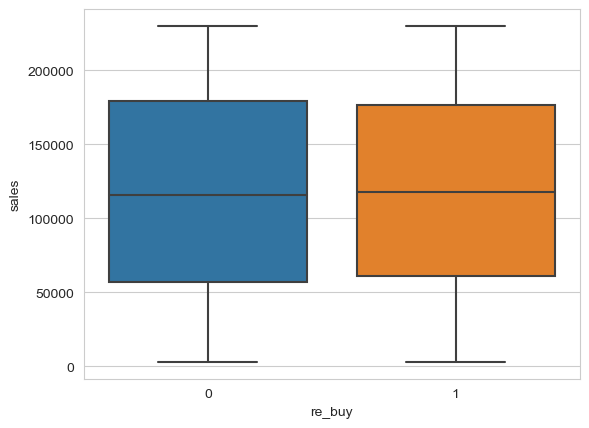

In [23]:
sns.boxplot(df,x='re_buy',y='sales')

## Answer
Methodology:
To answer the question I proceeded to sum the sales for each category in 're_buy' column.
Products bought more than once do not have better sales than products bought only once. The sum of sales of products bought more than once totals to ~89% of the values of products sold once.
The distribution of values of sales for products bought once is similar as for products bought more than once. Min and max values are similar, as well as means. There is a difference in interquartile range however this is not significant in that context.

# What products are more likely be purchased again for different types of pets?

In [24]:
df['pet_type']=df['pet_type'].str.strip()
df

C:\Users\adamd\AppData\Local\Temp\ipykernel_19504\569515532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pet_type']=df['pet_type'].str.strip()


,product_id,product_category,sales,price,vendor_id,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123000,94.81,VC_1605,small,fish,7,1
1,4567,Toys,61000,120.95,VC_1132,small,cat,10,0
3,4364,Snack,69000,241.27,VC_929,large,dog,1,1
4,4184,Supplements,138000,133.68,VC_749,large,dog,10,0
5,4609,Bedding,183000,51.60,VC_1174,large,cat,10,0
...,...,...,...,...,...,...,...,...,...
873,4343,Equipment,212000,129.84,VC_908,medium,cat,10,1
874,4999,Snack,27000,146.93,VC_1564,medium,bird,6,0
876,4783,Snack,162000,224.12,VC_1348,medium,cat,7,1
877,4664,Bedding,34000,199.15,VC_1229,large,dog,10,1


In [25]:
table = df.groupby(['re_buy','pet_type','product_category']).count()
table = table.reset_index()

In [26]:
table

,re_buy,pet_type,product_category,product_id,sales,price,vendor_id,pet_size,rating
0,0,bird,Accessory,1,1,1,1,1,1
1,0,bird,Bedding,1,1,1,1,1,1
2,0,bird,Clothes,1,1,1,1,1,1
3,0,bird,Equipment,11,11,11,11,11,11
4,0,bird,Food,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
77,1,fish,Housing,2,2,2,2,2,2
78,1,fish,Medicine,1,1,1,1,1,1
79,1,fish,Snack,8,8,8,8,8,8
80,1,fish,Supplements,1,1,1,1,1,1


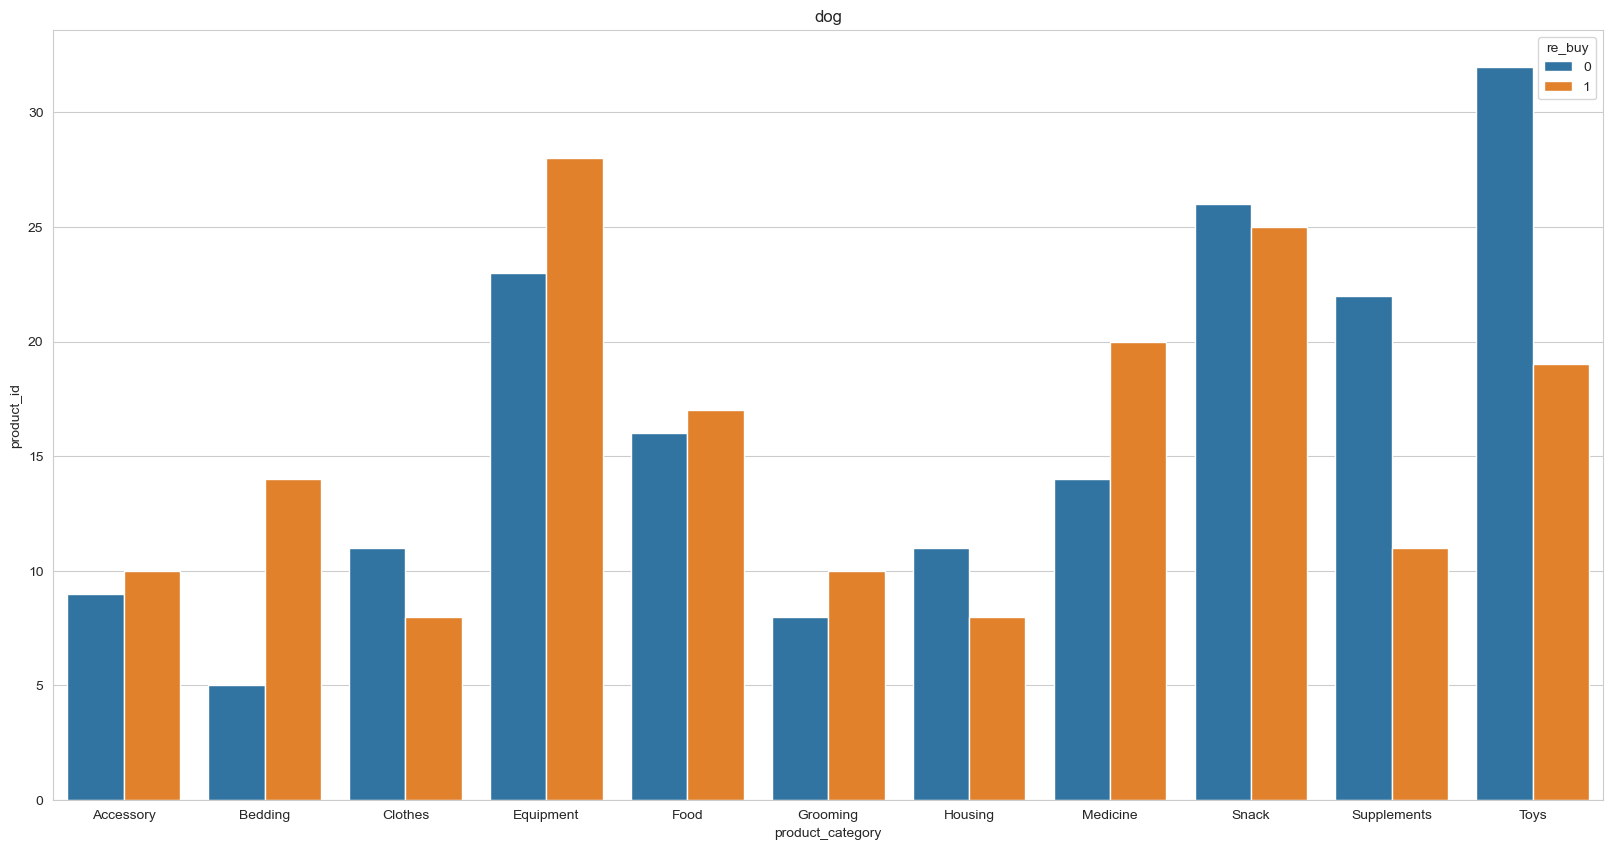

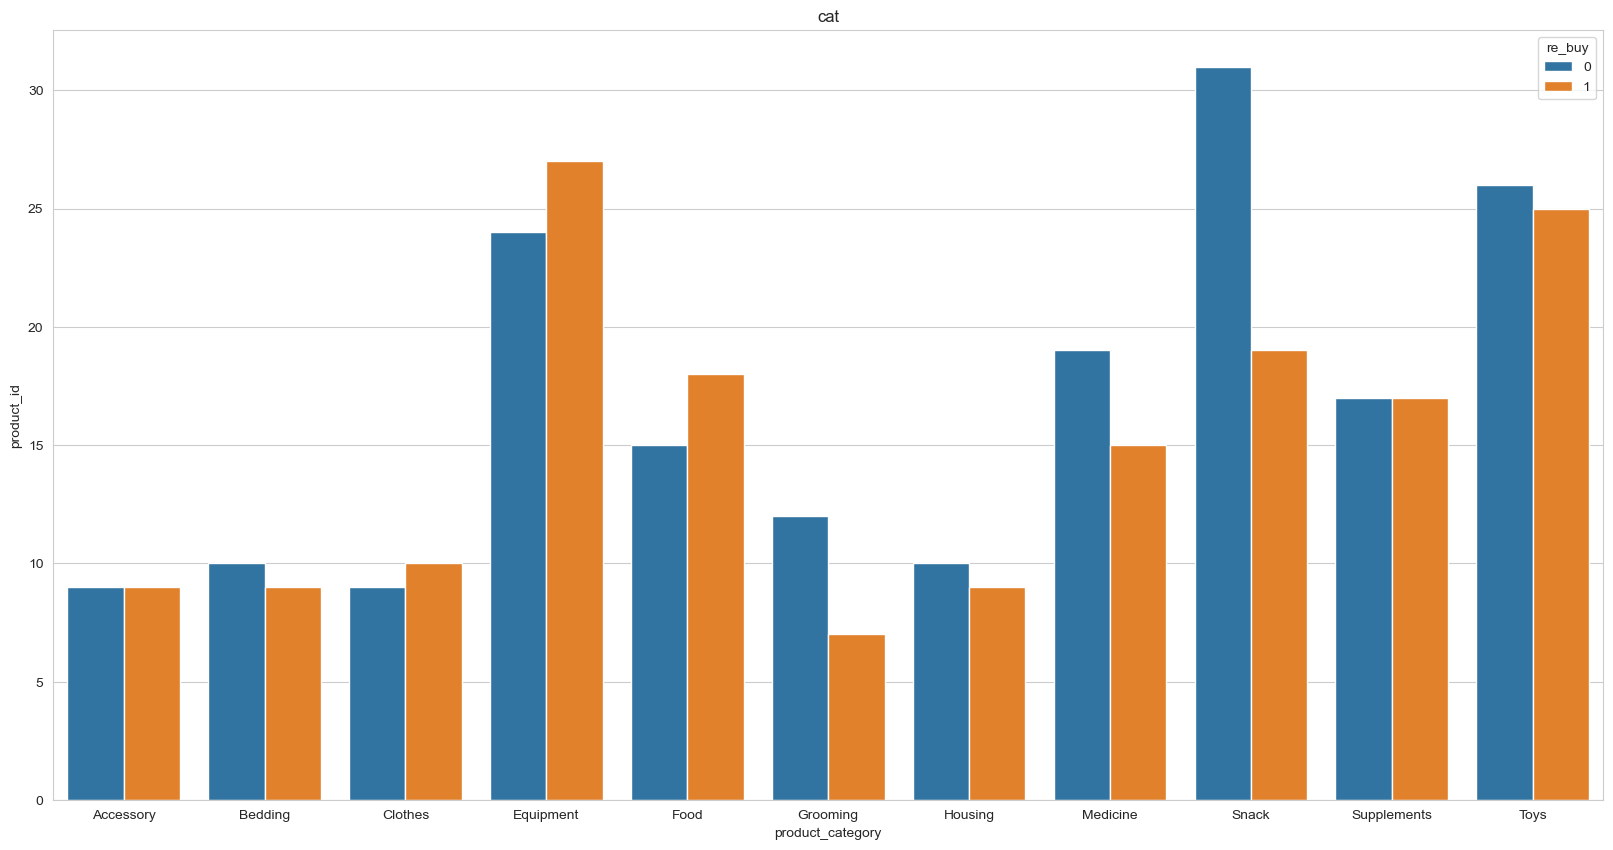

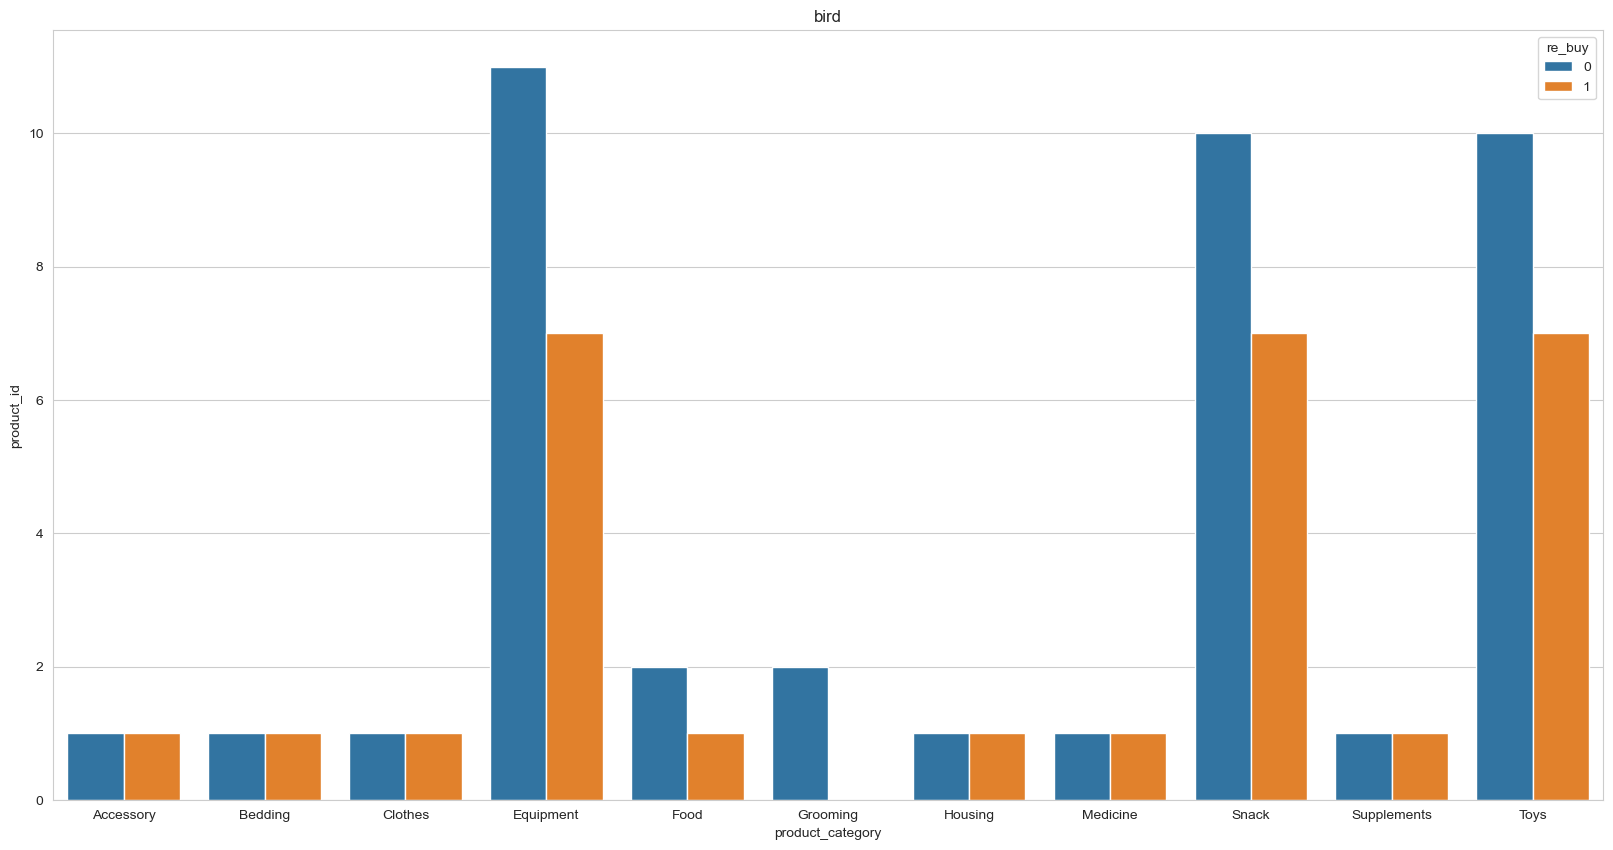

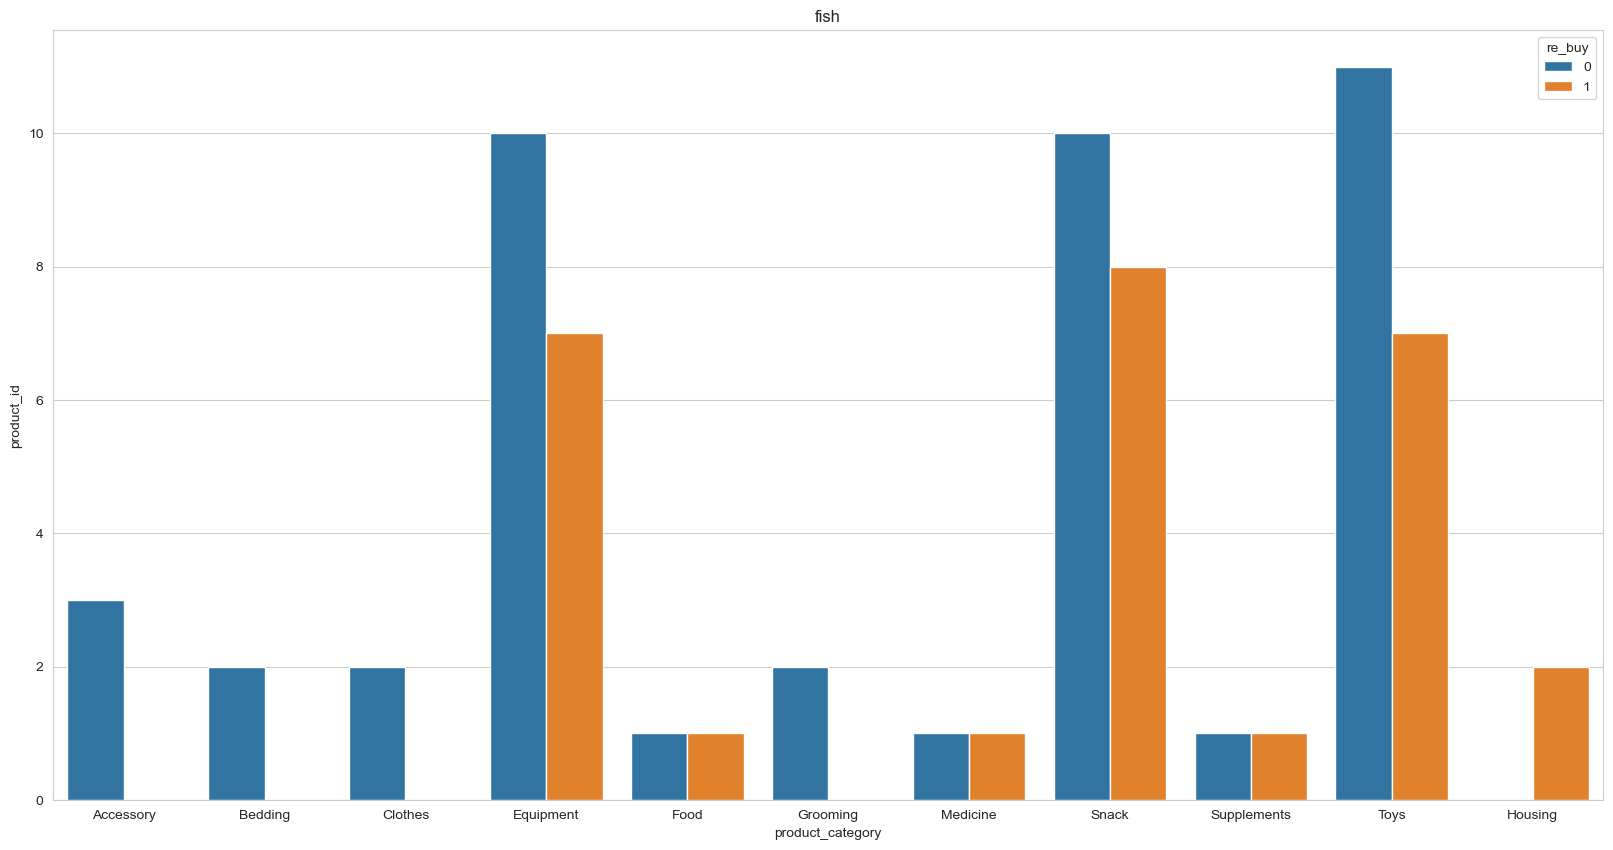

In [27]:
pet_list = ['dog','cat','bird','fish']

for pet in pet_list:
    plt.figure(figsize=(20,10))
    plt.title(pet)
    sns.barplot(table.loc[table['pet_type']==pet,:],x='product_category',y='product_id',hue='re_buy')

## Answer
Methodology:
To answer this question I decided to quantify the count of products that are bought once and more than once for every pet type and every category of a product. I was looking for the best ratio between amount of products bought more than once and I assumed that categories with the best ratio are more likely to be bough more than once. For each category I pointed out the TOP3.

For dogs:
There are a couple of product categories that are more likely to be bought more than once. The TOP3 is as follows:
- Bedding
- Equipment
- Medicine

For cats:
- Equipment
- Food
- Toys

For birds:
- Equipment
- Snack
- Toys

For fish:
- Housing
- Snack
- Equipment

Collectively Equipment and consumable categories are the most likely categories to be bought again.